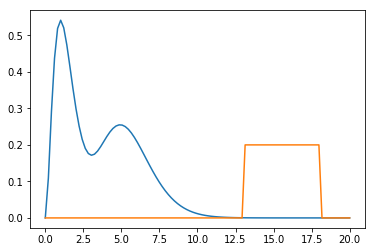

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
x = np.linspace(0, 20, 100)

def f(x):
    return stats.gamma.pdf(x, 3, loc=0, scale=0.5) +  stats.gamma.pdf(x, 11, loc=0, scale=0.5)

def g(x):
    return stats.uniform.pdf(x, loc=13, scale=5)


def h(x, t):
    return (1-t)*f(x) +  t*g(x)

ax.plot(x, f(x))
ax.plot(x, stats.uniform.pdf(x, loc=13, scale=5))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    t = i/100

    y = h(x, t)
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [4]:
anim.save('animation.gif', writer='imagemagick', fps=60)
